In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from dataloader import get_mnist_dataloaders  # Import your data loader function
from model import SimpleNN  # Import your model

In [29]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [30]:
train_loader, test_loader = get_mnist_dataloaders()

Training dataset size: 60000
Test dataset size: 10000


In [31]:
train_loader

In [32]:
test_loader

In [33]:
# Hyperparameters
num_epochs = 10
learning_rate = 0.001

In [34]:
# Instantiate the model
model = SimpleNN()

In [35]:
# Define loss function
criterion = torch.nn.CrossEntropyLoss()

In [25]:
# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [26]:
train_losses = []
test_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Calculate average training loss for the epoch
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Evaluate on the test set
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

    # Calculate average test loss for the epoch
    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    print(f"Epoch {epoch + 1}/{num_epochs} => Training Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")


Epoch 1/10 => Training Loss: 0.4035, Test Loss: 0.2274
Epoch 2/10 => Training Loss: 0.1890, Test Loss: 0.1483
Epoch 3/10 => Training Loss: 0.1364, Test Loss: 0.1446
Epoch 4/10 => Training Loss: 0.1098, Test Loss: 0.1146
Epoch 5/10 => Training Loss: 0.0932, Test Loss: 0.1023
Epoch 6/10 => Training Loss: 0.0813, Test Loss: 0.1087
Epoch 7/10 => Training Loss: 0.0740, Test Loss: 0.1011
Epoch 8/10 => Training Loss: 0.0657, Test Loss: 0.0949
Epoch 9/10 => Training Loss: 0.0610, Test Loss: 0.0980
Epoch 10/10 => Training Loss: 0.0533, Test Loss: 0.0960


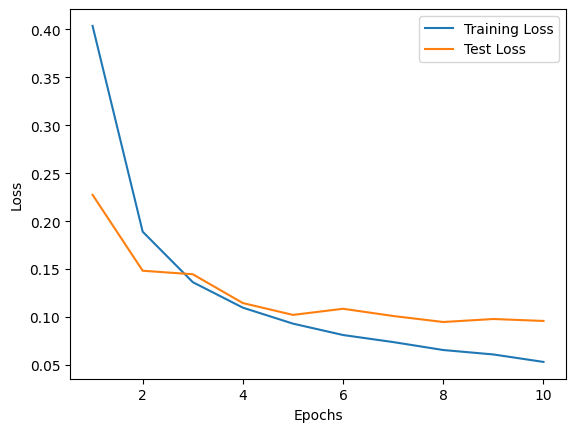

In [27]:
# Plotting the training and test losses
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10 => GD => Training Loss: 2.2211, Test Loss: 2.1146
Epoch 2/10 => GD => Training Loss: 1.9407, Test Loss: 1.7238
Epoch 3/10 => GD => Training Loss: 1.4795, Test Loss: 1.2420
Epoch 4/10 => GD => Training Loss: 1.0712, Test Loss: 0.9147
Epoch 5/10 => GD => Training Loss: 0.8193, Test Loss: 0.7204
Epoch 6/10 => GD => Training Loss: 0.6688, Test Loss: 0.6020
Epoch 7/10 => GD => Training Loss: 0.5761, Test Loss: 0.5291
Epoch 8/10 => GD => Training Loss: 0.5173, Test Loss: 0.4816
Epoch 9/10 => GD => Training Loss: 0.4777, Test Loss: 0.4450
Epoch 10/10 => GD => Training Loss: 0.4490, Test Loss: 0.4209
Epoch 1/10 => SGD => Training Loss: 2.2497, Test Loss: 2.1716
Epoch 2/10 => SGD => Training Loss: 2.0404, Test Loss: 1.8581
Epoch 3/10 => SGD => Training Loss: 1.6364, Test Loss: 1.3764
Epoch 4/10 => SGD => Training Loss: 1.1756, Test Loss: 0.9635
Epoch 5/10 => SGD => Training Loss: 0.8555, Test Loss: 0.7277
Epoch 6/10 => SGD => Training Loss: 0.6815, Test Loss: 0.6046
Epoch 7/10 => SGD

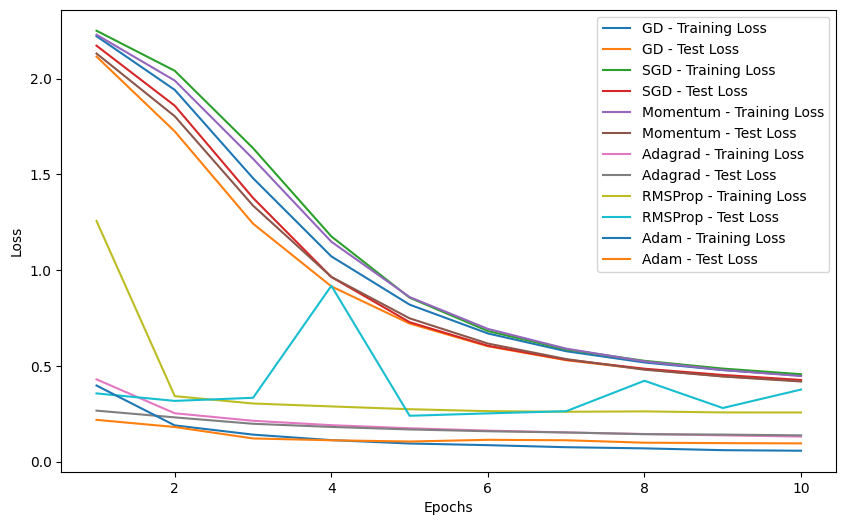

In [38]:
# Define optimization algorithms
optimizers = {
    'GD': optim.SGD,
    'SGD': optim.SGD,
    'Momentum': optim.SGD,
    'Adagrad': optim.Adagrad,
    'RMSProp': optim.RMSprop,
    'Adam': optim.Adam
}

# Training loop
results = {}

for optimizer_name, optimizer_class in optimizers.items():
    model = SimpleNN()  # Replace with your model
    model.to(device)

    # Initialize optimizer based on the algorithm
    if optimizer_name in ['GD', 'SGD', 'Momentum']:
        optimizer = optimizer_class(model.parameters(), lr=learning_rate)
    else:
        optimizer = optimizer_class(model.parameters())

    criterion = nn.CrossEntropyLoss()

    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Calculate average training loss for the epoch
        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        # Evaluate on the test set
        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()

        # Calculate average test loss for the epoch
        test_loss /= len(test_loader)
        test_losses.append(test_loss)

        print(f"Epoch {epoch + 1}/{num_epochs} => {optimizer_name} => Training Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

    # Save results
    results[optimizer_name] = {'train_losses': train_losses, 'test_losses': test_losses}

# Plotting the training and test losses for each optimizer
plt.figure(figsize=(10, 6))
for optimizer_name, result in results.items():
    plt.plot(range(1, num_epochs + 1), result['train_losses'], label=f'{optimizer_name} - Training Loss')
    plt.plot(range(1, num_epochs + 1), result['test_losses'], label=f'{optimizer_name} - Test Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()